In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [2]:
# Create linear and non-linear datasets
random = np.random.uniform(-10,10, size=(100,))
linear = {"X": random, "y": random}
nonlinear = io.loadmat("./ex5data1.mat")

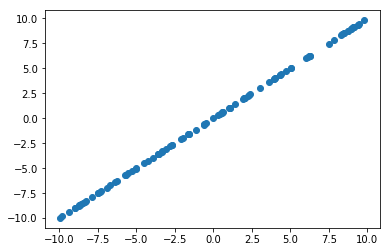

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(linear["X"], linear["y"])
plt.show()

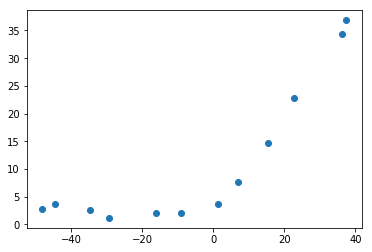

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(nonlinear["X"], nonlinear["y"])
plt.show()

In [5]:
class LinearRegression:
    def __init__(self, alpha= 0.001, n_iters = 2000):
        self.n_iters_ = n_iters
        self.alpha_ = alpha
    
    def fit(self, X, y):
        train_size = X.shape[0]
        
        # Adding bias term
        X = np.column_stack((np.ones((train_size, 1)), X))
        
        # Coeficients
        self.coef_ = np.ones((X.shape[1], 1))
        
        cost = []
        # Linear form
        h_x = np.dot(X, self.coef_)
            
        for epoch in range(self.n_iters_):
            # Linear form
            h_x = np.dot(X, self.coef_)
            
            # Cost function
            J = (1./(2 * train_size)) * np.sum(np.power((h_x - y), 2))
            
            # Gradient descent            
            self.coef_ = self.coef_ - self.alpha_ * ((1./train_size) *  np.transpose(X).dot(h_x - y))
            cost.append(J)
            
        return self.coef_, cost
    
    def predict(self, X):
        train_size = X.shape[0]
        # Adding bias term
        X = np.column_stack((np.ones(train_size), X))
        return np.dot(X, self.coef_)

In [6]:
lr = LinearRegression()
theta, cost = lr.fit(linear["X"], linear["y"])
y_pred = lr.predict(linear["X"])

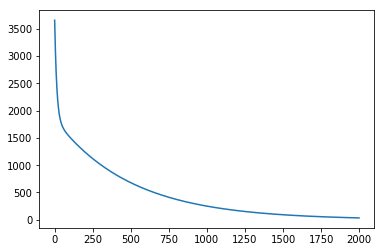

In [7]:
plt.plot(cost)
plt.show()

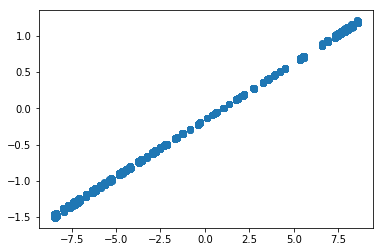

In [8]:
# plotting residuals vs predicted
plt.plot()
plt.scatter(y_pred, (linear["y"] - y_pred))
plt.show()

In [9]:
theta, cost = lr.fit(nonlinear["X"], nonlinear["y"])

In [10]:
y_pred = lr.predict(nonlinear["X"])

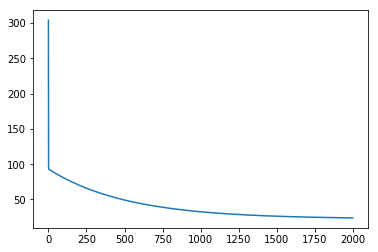

In [11]:
plt.plot(cost)
plt.show()

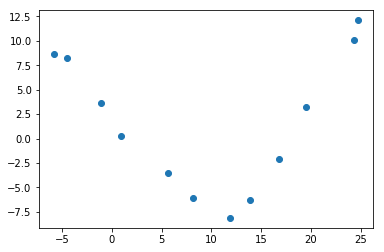

In [12]:
# plotting residuals vs predicted
plt.plot()
plt.scatter(y_pred, (nonlinear["y"] - y_pred))
plt.show()